## Atividade 1
Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [6]:
import pandas as pd

caminho = './'
arquivo = 'dataset_bancomundial.csv'

dataset_dados = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de um único termo em uma coluna
dataset_gpd = dataset_dados[dataset_dados['Indicator Name'].str.contains('GDP \(Current USD\)')]

print("Antes de remover haviam essas colunas.")
display(dataset_gpd.head(0))

dataset_gpd = dataset_gpd.drop(['Indicator Name', 'Indicator Code'], axis = 1)
print("Depois de removido há as seguintes colunas.")
display(dataset_gpd.head(0))

dataset_gpd.to_csv('dataset_gpd_ex1.csv', sep = ';', decimal = ',')


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,index,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [7]:
import pandas as pd

caminho = './'
arquivo = 'dataset_bancomundial_paises.csv'

codigo_paises_latinos = ['ARG', 'BRA', 'BOL',  'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

dataset_paises = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de varios termos em uma coluna
dataset_paises_latinos = dataset_paises.loc[pd.Series(dataset_paises['Country Code'].isin(codigo_paises_latinos))]

dataset_paises_latinos.to_csv('dataset_paises_latinos_ex2.csv', sep = ';', decimal = ',')

## Atividade 3
Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países da América do Sul;

Séries uniformes.


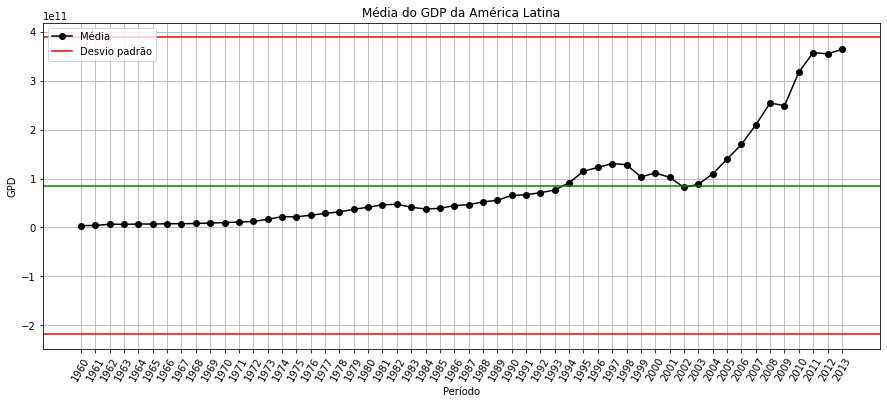

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 

caminho = './'
arquivo_dados = 'dataset_gpd_ex1.csv'
arquivo_paises_latinos = 'dataset_paises_latinos_ex2.csv'

def lendo_arquivo(arquivo: str):
    return pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

dataset_dados = lendo_arquivo(arquivo_dados)
dataset_paises_latinos = lendo_arquivo(arquivo_paises_latinos)
codigo_paises_latinos = dataset_paises_latinos['Country Code']

dataset_registros = dataset_dados.loc[pd.Series(dataset_dados['Country Code'].isin(codigo_paises_latinos))]
dataset_registros.reset_index(inplace = True, drop = True)

# gravando arquivo csv separado com gdp apenas dos países latinos
dataset_registros.to_csv('dataset_gpd_paises_latinos.csv', sep = ';', decimal = ',')

# deletando primeira coluna sem nome 
dataset_registros = dataset_registros.iloc[: , 1:]

# apagando colunas
dataset_registros = dataset_registros.drop(['index', 'Country Name', 'Country Code'], axis = 1) 

mean_GDP = dataset_registros.mean(numeric_only = True, skipna = True, axis = 0) 
std_GDP = dataset_registros.std(numeric_only = True, skipna = True, axis = 0) 

resultado = pd.DataFrame({'Média': mean_GDP, 'Desvio': std_GDP}).reset_index() 

anos = resultado['index']  
medias = resultado['Média'] 
desvios = resultado['Desvio']

if(len(anos) and len(medias) and len(desvios)): 
    print("Séries uniformes.")
    
# Plot x-bar and s charts
plt.subplots(figsize = (15,6))

# x-bar chart
plt.plot(anos, medias, linestyle = '-', marker = 'o', color = 'black')
plt.axhline((medias.mean() + desvios.mean() * 2), color = 'red')
plt.axhline((medias.mean() - desvios.mean() * 2), color = 'red')
plt.axhline(medias.mean(), color = 'green')

plt.legend(['Média', 'Desvio padrão'])
plt.title('Média do GDP da América Latina')
plt.xlabel("Período")
plt.grid()
plt.xticks(rotation = 60)
plt.ylabel("GPD")
plt.show()


## Exercício 4
Identifique os anos e os países que se encontram fora da faixa de controle;

In [89]:
import pandas as pd
caminho = './'
arquivo_dados_paises_latinos = 'dataset_gpd_paises_latinos.csv'

# lendo arquivo
dataset_dados_paises_latinos = pd.read_csv(caminho + arquivo_dados_paises_latinos, sep = ';', decimal = ',')

dataset_dados_paises_latinos.reset_index(inplace = True, drop = True)
 
# deletando duas primeiras colunas sem nome 
dataset_dados_paises_latinos = dataset_dados_paises_latinos.iloc[: , 2:]

# apagando colunas
dataset_dados_paises_latinos = dataset_dados_paises_latinos.drop(['index', 'Country Name', 'Country Code'], axis = 1) 

desvio_padrao_anos = dataset_dados_paises_latinos.std(numeric_only = True, skipna = True, axis = 0)

df_desvio = pd.DataFrame({'Desvio': desvio_padrao_anos}).reset_index() 
 
med = df_desvio['Desvio'].mean()

display(dataset_dados_paises_latinos)

maiores_desvio_padrao = dataset_dados_paises_latinos.agg(lambda x : x > med * 2 )
menores_desvio_padrao = dataset_dados_paises_latinos.agg(lambda x : x < med * -2 )

display(maiores_desvio_padrao)
display(menores_desvio_padrao)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,NaN,NaN,2.445060e+10,1.827212e+10,2.560525e+10,2.834471e+10,2.863047e+10,2.425667e+10,2.643686e+10,3.125628e+10,...,1.832960e+11,2.229080e+11,2.644900e+11,3.297610e+11,4.060040e+11,3.784960e+11,4.627040e+11,5.577270e+11,6.031530e+11,6.098890e+11
1,5.631101e+08,6.125189e+08,6.697225e+08,7.211430e+08,8.125431e+08,9.088745e+08,9.940446e+08,1.084060e+09,9.088745e+08,9.646157e+08,...,8.773452e+09,9.549196e+09,1.145185e+10,1.312018e+10,1.667432e+10,1.733999e+10,1.964963e+10,2.394854e+10,2.703511e+10,3.060116e+10
2,1.516557e+10,1.523685e+10,1.992629e+10,2.302148e+10,2.121189e+10,2.179004e+10,2.706272e+10,3.059183e+10,3.387588e+10,3.745890e+10,...,6.637600e+11,8.821860e+11,1.088920e+12,1.366820e+12,1.653510e+12,1.620190e+12,2.143070e+12,2.476690e+12,2.248780e+12,2.245670e+12
3,4.211763e+09,4.705378e+09,5.502763e+09,5.482749e+09,5.794302e+09,6.053790e+09,7.013580e+09,6.913561e+09,7.074820e+09,8.179771e+09,...,1.006310e+11,1.244040e+11,1.546710e+11,1.730060e+11,1.798580e+11,1.723230e+11,2.175020e+11,2.511620e+11,2.662590e+11,2.771990e+11
4,4.040948e+09,4.552914e+09,4.968598e+09,4.838841e+09,5.992169e+09,5.790248e+09,5.452763e+09,5.727208e+09,5.918468e+09,6.405440e+09,...,1.170750e+11,1.465200e+11,1.627740e+11,2.075200e+11,2.440570e+11,2.338220e+11,2.870180e+11,3.354150e+11,3.703280e+11,3.784150e+11
5,1.010325e+09,9.791088e+08,9.585982e+08,1.038390e+09,1.156151e+09,2.387048e+09,2.429310e+09,2.553596e+09,2.582181e+09,3.112167e+09,...,3.659166e+10,4.150708e+10,4.680204e+10,5.100778e+10,6.176264e+10,6.251969e+10,6.955537e+10,7.927666e+10,8.762341e+10,9.447268e+10
6,1.702162e+08,1.858495e+08,1.949495e+08,1.757579e+08,1.947745e+08,2.132353e+08,2.287059e+08,2.501765e+08,2.297500e+08,2.493000e+08,...,7.859188e+08,8.248806e+08,1.458449e+09,1.740335e+09,1.922598e+09,2.025565e+09,2.259288e+09,2.576602e+09,2.851154e+09,2.990129e+09
7,NaN,NaN,NaN,NaN,NaN,4.001297e+08,4.217004e+08,4.515241e+08,4.770125e+08,5.127289e+08,...,8.033877e+09,8.734651e+09,1.066201e+10,1.379491e+10,1.850413e+10,1.592990e+10,2.003053e+10,2.507119e+10,2.461104e+10,2.900941e+10
8,2.503709e+09,2.822764e+09,3.199617e+09,3.505471e+09,4.241381e+09,5.026100e+09,5.947054e+09,6.029752e+09,5.583979e+09,6.250646e+09,...,6.673031e+10,7.496382e+10,8.798569e+10,1.021720e+11,1.215720e+11,1.212000e+11,1.485230e+11,1.705640e+11,1.926280e+11,2.023500e+11
9,9.385000e+07,9.840000e+07,1.035000e+08,1.100000e+08,1.208500e+08,1.386500e+08,1.711000e+08,1.984500e+08,2.206000e+08,2.334500e+08,...,1.484093e+09,1.793558e+09,2.626093e+09,2.936612e+09,3.532969e+09,3.875410e+09,4.368398e+09,4.423195e+09,5.013030e+09,5.298788e+09


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
